# Spencer-Fano testing

In [1]:
from tardis import run_tardis
from tardis.io.config_reader import Configuration
import numpy as np
from astropy import units as u
import pandas as pd

In [2]:
config = Configuration.from_yaml("docs/models/examples/tardis_example.yml")
del config['config_dirname']

In [3]:
config.model.abundances['O'] = 1.0
config.model.abundances['Mg'] = 0.0
config.model.abundances['Si'] = 0.0
config.model.abundances['Ar'] = 0.0
config.model.abundances['S'] = 0.0
config.model.abundances['Ca'] = 0.0
config.model.abundances['Fe'] = 0.0

config.montecarlo.iterations = 1

In [4]:
sim = run_tardis(config)

[tardis.plasma.standard_plasmas][INFO   ]  Reading Atomic Data from kurucz_cd23_chianti_H_He.h5 (standard_plasmas.py:87)
[tardis.io.atom_data.util][INFO   ]  Atom Data kurucz_cd23_chianti_H_He.h5 not found in local path. Exists in TARDIS Data repo /home/afullard/Downloads/tardis-data/kurucz_cd23_chianti_H_He.h5 (util.py:35)
[tardis.io.atom_data.base][INFO   ]  Read Atom Data with UUID=6f7b09e887a311e7a06b246e96350010 and MD5=864f1753714343c41f99cb065710cace. (base.py:187)
[tardis.io.atom_data.base][INFO   ]  Non provided atomic data: synpp_refs, photoionization_data (base.py:193)
[tardis.simulation.base][INFO   ]  Starting iteration 1/1 (base.py:326)
Running post-merge numba montecarlo (with C close lines)!
[tardis.simulation.base][INFO   ]  Luminosity emitted = 8.98661e+42 erg / s Luminosity absorbed = 1.69839e+42 erg / s Luminosity requested = 1.05928e+43 erg / s (base.py:451)
[tardis.simulation.base][INFO   ]  Simulation finished in 1 iterations and took 10.03 s (base.py:384)


In [5]:
import tardis.energy_input.spencer_fano as sf
from collections import namedtuple

def read_colliondata(collionfilename="/home/afullard/spencer-fano/data/collion.txt"):

    collionrow = namedtuple(
        "collionrow", ["atomic_number", "nelec", "n", "l", "ion_potential", "A", "B", "C", "D"]
    )

    with open(collionfilename, "r") as collionfile:
        print(f"Collionfile: expecting {collionfile.readline().strip()} rows")
        dfcollion = pd.read_csv(
            collionfile, delim_whitespace=True, header=None, names=collionrow._fields
        )
    dfcollion.eval("ion_number = atomic_number - nelec", inplace=True)

    return dfcollion

sim.plasma.ion_collision_data = read_colliondata()

Collionfile: expecting 390 rows


In [6]:
sim.plasma.ion_collision_data

,atomic_number,nelec,n,l,ion_potential,A,B,C,D,ion_number
0,1,1,1,0,13.6,22.8,-12.0,1.9,-22.6,0
1,2,2,1,0,24.6,17.8,-11.0,7.0,-23.2,0
2,2,1,1,0,54.4,14.4,-5.6,1.9,-13.3,1
3,6,6,2,1,11.3,6.0,-16.0,12.0,-15.1,0
4,6,6,2,0,16.6,24.3,-7.8,2.5,-24.0,0
...,...,...,...,...,...,...,...,...,...,...
395,28,4,1,0,9914.0,24.3,-8.0,4.1,-18.0,24
396,28,3,2,0,2399.0,9.2,-2.6,1.4,-5.7,25
397,28,3,1,0,10020.0,24.3,-8.0,4.1,-18.0,25
398,28,2,1,0,10280.0,25.0,-8.5,3.7,-20.1,26


In [7]:
sim.plasma.atomic_data.levels

energy  g  metastable
atomic_number ion_number level_number                             
8             0          0             0.000000e+00  5        True
                         1             3.143848e-14  3        True
                         2             4.508775e-14  1        True
                         3             3.152065e-12  5        True
                         4             6.712713e-12  1        True
...                                             ... ..         ...
              5          37            2.090313e-10  4       False
                         38            2.090339e-10  6       False
              6          0             0.000000e+00  1        True
              7          0             0.000000e+00  2        True
              8          0             0.000000e+00  1        True

[749 rows x 3 columns]

In [8]:
sim.plasma.atomic_data.lines

#Current BLOCKER- cross section calculation, needs A_ul

line_id  \
atomic_number ion_number level_number_lower level_number_upper            
8             5          0                  34                    27475   
                                            33                    27474   
                                            26                    27476   
                                            27                    27477   
                                            19                    27478   
...                                                                 ...   
              1          83                 103                   25324   
                         82                 102                   25325   
              5          27                 29                    27689   
                         26                 28                    27691   
                         27                 28                    27690   

                                                                   wavelength  \
atomic_number ion_number level_number_lower level_number_upper                  
8             5          0                  34                      95.082000   
                                            33                      95.082000   
                                            26                      96.840000   
                                            27                      96.840000   
                                            19                      99.688000   
...                                                                       ...   
              1          83                 103                  98251.132489   
                         82                 102                  98347.759823   
              5          27                 29                  142045.454964   
                         26                 28                  147058.821299   
                         27                 28                  147058.821299   

                                                                    f_ul  \
atomic_number ion_number level_number_lower level_number_upper             
8             5          0                  34                  0.002182   
                                            33                  0.002188   
                                            26                  0.003326   
                                            27                  0.003318   
                                            19                  0.005559   
...                                                                  ...   
              1          83                 103                 0.000658   
                         82                 102                 0.002339   
              5          27                 29                  0.117449   
                         26                 28                  0.096814   
                         27                 28                  0.019317   

                                                                    f_lu  \
atomic_number ion_number level_number_lower level_number_upper             
8             5          0                  34                  0.004365   
                                            33                  0.002188   
                                            26                  0.003326   
                                            27                  0.006637   
                                            19                  0.005559   
...                                                                  ...   
              1          83                 103                 0.000438   
                         82                 102                 0.001169   
              5          27                 29                  0.176173   
                         26                 28                  0.193629   
                         27                 28                  0.019317   

                                                        

In [9]:
(electron_spectrum,
transitions_dict,
energy_grid,
ions,
ion_populations,
energy_deposition_density,
ion_collision_data,
electron_number_density,
number_density) = sf.setup_solution(0.1, 3000, 5, temperature=6000, plasma = sim.plasma, energy_deposition_density=100)

# TODO get atomic data from TARDIS for transitions and levels

1.3806488e-16

Setting up Spencer-Fano equation with 5 energy points from 0.1 to 3000.0 eV...
    E_init: 3000.0 eV/s/cm3
with 50 transitions from lower <= 4
with 189 transitions from lower <= 4
with 111 transitions from lower <= 4
with 74 transitions from lower <= 4
with 69 transitions from lower <= 4
with 62 transitions from lower <= 4
with 0 transitions from lower <= 4
with 0 transitions from lower <= 4
with 0 transitions from lower <= 4


Text(0, 0.5, 'y(E)')

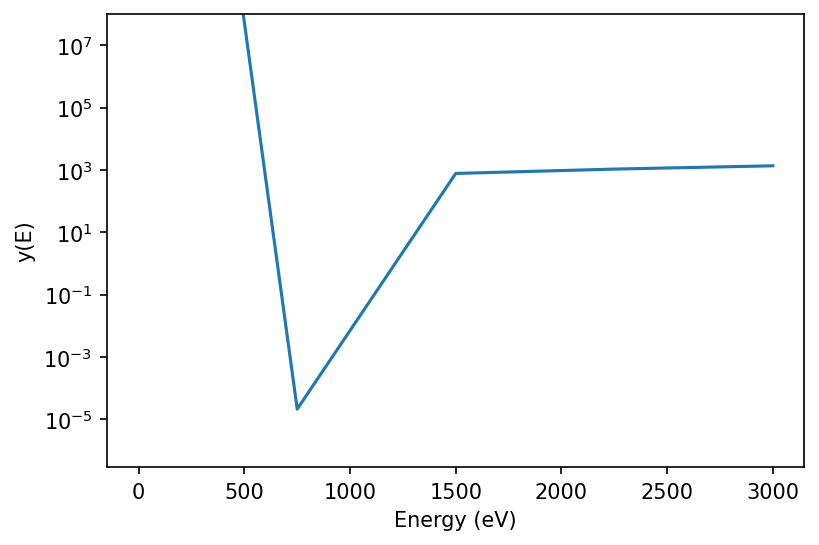

In [10]:
import matplotlib.pyplot as plt

plt.figure(dpi=150)
plt.semilogy(energy_grid.grid, electron_spectrum)
plt.ylim(0, 1e8)
plt.xlabel("Energy (eV)")
plt.ylabel("y(E)")

In [11]:
electron_spectrum

array([3.54251767e+32, 2.10389657e-05, 7.67925711e+02, 1.06012060e+03,
       1.35097409e+03])

In [12]:
import tardis.energy_input.non_thermal_fractions as ntf

ntf.total_fractions(energy_grid, electron_spectrum, transitions_dict, ion_collision_data, ion_populations, energy_deposition_density, electron_number_density,
number_density)

fractional_ionization_of_shell(n 2 l 1): 
0.0 (ionpot 13.6 eV)
  cross section at 750.0750000 eV and 3000 eV 4.04e-17 and 1.45e-17
fractional_ionization_of_shell(n 2 l 0): 
0.0 (ionpot 28.5 eV)
  cross section at 750.0750000 eV and 3000 eV 9.57e-18 and 3.07e-18
fractional_ionization_of_shell(n 2 l 1): 
0.015 (ionpot 35.1 eV)
  cross section at 750.0750000 eV and 3000 eV 1.45e-17 and 5.01e-18
fractional_ionization_of_shell(n 2 l 0): 
0.0072 (ionpot 42.6 eV)
  cross section at 750.0750000 eV and 3000 eV 5.88e-18 and 1.96e-18
fractional_ionization_of_shell(n 2 l 1): 
0.0 (ionpot 54.9 eV)
  cross section at 750.0750000 eV and 3000 eV 6.50e-18 and 2.22e-18
fractional_ionization_of_shell(n 2 l 0): 
0.0 (ionpot 63.8 eV)
  cross section at 750.0750000 eV and 3000 eV 3.48e-18 and 1.22e-18
fractional_ionization_of_shell(n 2 l 1): 
0.0 (ionpot 77.4 eV)
  cross section at 750.0750000 eV and 3000 eV 2.06e-18 and 7.29e-19
fractional_ionization_of_shell(n 2 l 0): 
0.0 (ionpot 87.6 eV)
  cross section

(0.022275557987217965, 448963.46757768217, array([0.22376993]))

In [13]:
import matplotlib.pyplot as plt

level = x.index.get_level_values("level_number")
energy = x.energy.values

plt.plot(level, energy, ".")

NameError: name 'x' is not defined

In [10]:
sim.plasma.level_boltzmann_factor

0             1   \
atomic_number ion_number level_number                               
8             0          0             5.000000e+00  5.000000e+00   
                         1             2.932256e+00  2.931760e+00   
                         2             9.677744e-01  9.675397e-01   
                         3             5.063458e-01  4.978298e-01   
                         4             7.621496e-03  7.351105e-03   
...                                             ...           ...   
              5          37            4.462813e-66  1.449121e-66   
                         38            6.681673e-66  2.169577e-66   
              6          0             1.000000e+00  1.000000e+00   
              7          0             2.000000e+00  2.000000e+00   
              8          0             1.000000e+00  1.000000e+00   

                                                 2             3   \
atomic_number ion_number level_number                               
8             0          0             5.000000e+00  5.000000e+00   
                         1             2.931562e+00  2.931414e+00   
                         2             9.674458e-01  9.673755e-01   
                         3             4.944648e-01  4.919580e-01   
                         4             7.245693e-03  7.167688e-03   
...                                             ...           ...   
              5          37            9.242160e-67  6.597690e-67   
                         38            1.383699e-66  9.877752e-67   
              6          0             1.000000e+00  1.000000e+00   
              7          0             2.000000e+00  2.000000e+00   
              8          0             1.000000e+00  1.000000e+00   

                                                 4             5   \
atomic_number ion_number level_number                               
8             0          0             5.000000e+00  5.000000e+00   
                         1             2.931290e+00  2.930971e+00   
                         2             9.673170e-01  9.671661e-01   
                         3             4.898835e-01  4.845686e-01   
                         4             7.103473e-03  6.940354e-03   
...                                             ...           ...   
              5          37            4.985262e-67  2.418332e-67   
                         38            7.463675e-67  3.620569e-67   
              6          0             1.000000e+00  1.000000e+00   
              7          0             2.000000e+00  2.000000e+00   
              8          0             1.000000e+00  1.000000e+00   

                                                 6             7   \
atomic_number ion_number level_number                               
8             0          0             5.000000e+00  5.000000e+00   
                         1             2.931095e+00  2.930985e+00   
                         2             9.672248e-01  9.671729e-01   
                         3             4.866299e-01  4.848068e-01   
                         4             7.003379e-03  6.947621e-03   
...                                             ...           ...   
              5          37            3.204576e-67  2.498445e-67   
                         38            4.797698e-67  3.740510e-67   
              6          0             1.000000e+00  1.000000e+00   
              7          0             2.000000e+00  2.000000e+00   
              8          0             1.000000e+00  1.000000e+00   

                                                 8             9   \
atomic_number ion_number level_number                               
8             0          0             5.000000e+00  5.000000e+00   
                         1             2.930957e+00  2.930705e+00   
                         2             9.671593e-01  9.670400e-01   
                         3             4.843303e-01  4.801731e-01   
                         4             6.93

In [11]:
sim.plasma.partition_function

0         1         2         3         4   \
atomic_number ion_number                                                     
8             0           9.414450  9.404892  9.401114  9.398299  9.395969   
              1           4.225967  4.219335  4.216739  4.214814  4.213227   
              2           9.007027  8.999164  8.996058  8.993744  8.991830   
              3           5.783713  5.782124  5.781490  5.781014  5.780619   
              4           1.000063  1.000058  1.000056  1.000054  1.000053   
              5           2.000005  2.000005  2.000004  2.000004  2.000004   
              6           1.000000  1.000000  1.000000  1.000000  1.000000   
              7           2.000000  2.000000  2.000000  2.000000  2.000000   
              8           1.000000  1.000000  1.000000  1.000000  1.000000   

                                5         6         7         8         9   \
atomic_number ion_number                                                     
8             0           9.389999  9.392314  9.390266  9.389731  9.385060   
              1           4.209185  4.210748  4.209365  4.209004  4.205868   
              2           8.986924  8.988827  8.987144  8.986705  8.982868   
              3           5.779600  5.779997  5.779646  5.779555  5.778750   
              4           1.000050  1.000051  1.000050  1.000050  1.000048   
              5           2.000004  2.000004  2.000004  2.000004  2.000004   
              6           1.000000  1.000000  1.000000  1.000000  1.000000   
              7           2.000000  2.000000  2.000000  2.000000  2.000000   
              8           1.000000  1.000000  1.000000  1.000000  1.000000   

                                10        11        12        13        14  \
atomic_number ion_number                                                     
8             0           9.382000  9.377943  9.375108  9.372730  9.371489   
              1           4.203825  4.201131  4.199259  4.197695  4.196881   
              2           8.980355  8.977025  8.974697  8.972746  8.971727   
              3           5.778220  5.777513  5.777016  5.776597  5.776378   
              4           1.000047  1.000045  1.000044  1.000043  1.000042   
              5           2.000004  2.000003  2.000003  2.000003  2.000003   
              6           1.000000  1.000000  1.000000  1.000000  1.000000   
              7           2.000000  2.000000  2.000000  2.000000  2.000000   
              8           1.000000  1.000000  1.000000  1.000000  1.000000   

                                15        16        17        18        19  
atomic_number ion_number                                                    
8             0           9.368199  9.363787  9.360657  9.357807  9.355591  
              1           4.194730  4.191864  4.189842  4.188010  4.186592  
              2           8.969028  8.965409  8.962841  8.960504  8.958687  
              3           5.775795  5.775008  5.774446  5.773932  5.773530  
              4           1.000041  1.000039  1.000038  1.000037  1.000036  
              5           2.000003  2.000003  2.000003  2.000003  2.000003  
              6           1.000000  1.000000  1.000000  1.000000  1.000000  
              7           2.000000  2.000000  2.000000  2.000000  2.000000  
              8           1.000000  1.000000  1.000000  1.000000  1.000000

In [12]:
sim.plasma.partition_function.loc[:, 0]

atomic_number  ion_number
8              0             9.414450
               1             4.225967
               2             9.007027
               3             5.783713
               4             1.000063
               5             2.000005
               6             1.000000
               7             2.000000
               8             1.000000
Name: 0, dtype: float64

In [13]:
ion.name

NameError: name 'ion' is not defined

In [1]:
atomic_transition_data = sim.plasma.atomic_data.macro_atom_data

NameError: name 'sim' is not defined

In [11]:
atomic_number = 8
ion_number = 0

ion = atomic_transition_data.query(
            "atomic_number == @atomic_number and ion_number == @ion_number"
        )

In [39]:
levels = sim.plasma.atomic_data.levels.query(
            "ion_number == 0" + " and atomic_number == 8"
        )

ion = sim.plasma.atomic_data.macro_atom_data.query(
            "atomic_number == 8 and ion_number == 0"
        )

print(len(ion))

src_energy= []
dest_energy= []

for level_id in ion["destination_level_number"]:
    dest_energy.append(levels.query('level_number == @level_id').energy.values)

for level_id in ion["source_level_number"]:
    src_energy.append(levels.query('level_number == @level_id').energy.values)



2562


In [43]:
np.array(dest_energy) - np.array(src_energy) > 0

array([[ True],
       [ True],
       [ True],
       ...,
       [False],
       [False],
       [False]])